# Frequent Items
### Adam Gibbs
##### 5 March 2021

This jupyter notebook includes the report for my Apriori MapReduce frequent Itemsets homework and first includes a graph of runtime vs corr_factor and then a graph of ouput lengths vs corr_factor.

In [4]:
# IMPORTS
import matplotlib.pyplot as plt

In [2]:
# Results from runs

corr_factor = [1,0.975,0.95,0.9,0.85]
interm_len = [484, 645, 826, 1531, 2761]
output_len = [313, 313, 321, 338, 353]
runtimes = [80033, 97291, 142158, 296152, 921055]

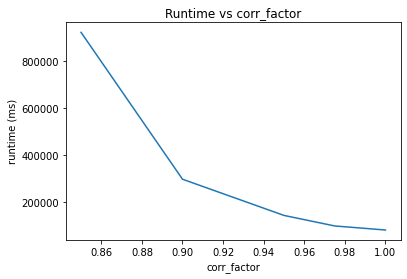

In [6]:
# RUNTIME GRAPH

plt.plot(corr_factor, runtimes)
plt.xlabel("corr_factor")
plt.ylabel("runtime (ms)")
plt.title("Runtime vs corr_factor")
plt.show()



### Comments on Runtime Plot
The graph shows that the runtime decreases as the correction factor parameter increases. This makes sense as a lower corr_factor lowers the threshold in the first Mapping round for a candidate to be considered in the second round map function. This means for each itemset size, more candidates are generated and pruned, and we have to calculate the support for more candidates. This also means more itemsets are passed to the second round mapper which has to calculate the support of more itemsets. Further, a lower threshold means more large itemsets will be generated and those are the most costly to find the support of so we see the runtime increase nonlinearly as corr_factor decreases. Also, as we saw with frequent itemsets, there are more low support items than high support items so a lower threshold means a greater-than-linearly increasing number of itemsets to consider. For these reasons we see the runtime increase as the corr_factor decreases. 

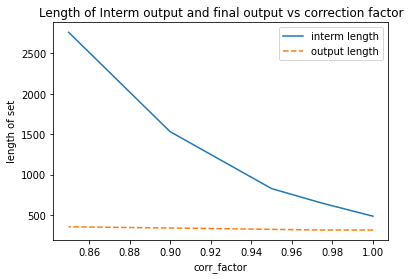

In [7]:
# INTERM/OUTPUT LENGTH GRAPH
# plot the two lines with different styles (colors automatic)
# label each line for legend
plt.plot(corr_factor, interm_len, label="interm length", linestyle="-")
plt.plot(corr_factor, output_len, label="output length", linestyle="--")
# give plot a title and label each axis
plt.title("Length of Interm output and final output vs correction factor")
plt.xlabel("corr_factor")
plt.ylabel("lenth of set")
# show legend and then plot
plt.legend()
plt.show()

### Comments on length of output graph
This graph depicts the length of the intermediate output vs corr_factor, shown in solid blue, and the length of the final output vs corr_factor, shown in dashed orange. We see the interm length increase at a rate greater than linear as the corr_factor decreases. As we discussed above, this is because the threshold to be included decreases and more itemsets are considered candidates. Also as we stated above, there are more itemsets of low frequency so as we decrease corr_factor we see many more itemsets and that is why the increase is more than linear. The final output length also increases as corr_factor decreases, however, it increases at a much smaller rate. In fact, the difference from the largest and smalled final output length is 40. 

We see these inreases as corr_factor decreases because the job of corr_factor is to reduce the number of false negatives in our data mining. As we lower the threshold with corr_factor we generate more candidates from mapper round one and our probability of excluding a candidate itemset decreases. This is also why a lower corr_factor increases the final output length. With the runs of lower corr_factors we find the support of itemsets that have a frequency very close to our preset threshold, and thus, we can say we've reduced the number of false negatives in our mining of frequent itemsets. However, the number of false neagtives in relatively small and the accidents dataset is fairly dense so there are more high frequency items than most real world datasets. So in this case, corr_factor has a noticeable impact on the number of false negatives but I would infer that on a more sparse dataset the corr_factor wouldn't change the number of false negatives as much. 

This analysis leads in to the discussion of whether to trade off accuracy for runtime. And this question is completely dependent on the specific itemset mining task you're doing. It also appears that runtime increases more than accuracy as you decrease corr_factor so the accuracy payoff gets more expensive in terms of runtime as you look for more and more accuracy. So overall, you'd want to make the corr_factor as high as you can without sacrificing accuracy that you need. 
